In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

import ConstructPortfolio as cp #this will allow us to modularize the code!
#using "ConstructPortfolio.py" that is stored in the same directory! 
#(not using "ConstructPortfolio.ipynb")



/Users/bardiafarajnejad/Desktop/1st Half MFE/AFP/Final Delivery/MFE Group 16 AFP Code


# It pays to bet on marginal value (ie on sell days) AT THE 1 DAY HORIZON ONLY as this portfolio does better than the buy days that bets on marginal growth (ONLY AT 1 DAY HORIZON!)

# When we add volume to the signal, the signal reverses and it becomes better to bet on GROWTH! (ONLY AT 1-5 DAY HORIZON!)

In [2]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl')
data.columns.values

array(['tradedate', 'osid', 'symbol', 'coname', 'sector_group', 'max_dt',
       'previoustradedate', 'tickssinceipo', 'alpha', 'stdev_alpha',
       'pricehigh', 'pricelow', 'priceclose', 'priceopen', 'splitfactor',
       'cumsplitfactor', 'volume', 'unadjustedpriceclose', 'pricepctchgd',
       'avgvol50d', 'avgdollarvol50d', 'growthscore', 'growthrank',
       'lastupdatetime', 'epsq1', 'epsq2', 'epsq3', 'epsq4', 'epsq5',
       'epsq6', 'epsq7', 'epsq8', 'epshighq1', 'epshighq2', 'epshighq3',
       'epshighq4', 'epshighq5', 'epshighq6', 'epshighq7', 'epshighq8',
       'epslowq1', 'epslowq2', 'epslowq3', 'epslowq4', 'epslowq5',
       'epslowq6', 'epslowq7', 'epslowq8', 'salesq1', 'salesq2',
       'salesq3', 'salesq4', 'salesq5', 'salesq6', 'salesq7', 'salesq8',
       'saleshighq1', 'saleshighq2', 'saleshighq3', 'saleshighq4',
       'saleshighq5', 'saleshighq6', 'saleshighq7', 'saleshighq8',
       'saleslowq1', 'saleslowq2', 'saleslowq3', 'saleslowq4',
       'saleslowq5', 's

In [3]:
data = data[data['growthscore'].notna()].reset_index(drop=True).copy() #drop na values

np.unique(data['growthscore']) #similar to a Z-score I think!

array([-6.59182383, -6.57789589, -6.56822451, ...,  6.38219697,
        6.3973808 ,  6.41480611])

# growthscore

### Now, let's trade on when growthscore changes
### the times when 'growthscore' changes
###### Buy when change, so when df['growthscore'].diff(1) > 0
###### Sell when no change, so when df['growthscore'].diff(1) < 0
### with 1 day, 1 week, 2 weeks, 3 weeks, and 4 weeks holding period 
### (AHEAD, not backward... so our ret, ret5d, 10d, 15d, and 20d needs to be forward)
### Thus, we will use ret5d_'lag' !!

# Set buy_tomorrow>0 when df['growthscore'].diff(1) > 0
# Set Sell_tomorrow>0 when df['growthscore'].diff(1) < 0


In [4]:
data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['growthscore'].notna()].reset_index(drop=True).copy() #drop na values

data['buy_tomorrow'] = np.where(data['growthscore'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['growthscore'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'


Total number of Buys:  1367882
Total number of Sells:  1430527
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]


In [5]:
data = cp.trade_on_valid_lags_only(data)


There are  268  problems for buying

There are  304  problems for selling
Total number of Buys:  1367614
Total number of Sells:  1430223


# Now we can trade!
### Holding period of 1 week, 2 weeks, 3 weeks, and 4 weeks with equal weighted portfolios!

# First, create daily equal weighted portfolio weights and returns (NOT AT THE WEEKLY frequency because that will mess up the implementation of the portfolio!). Problem is:

##### Think (part 1): 1st signal on Monday- want to buy on Tuesday and hold for 1 week in an equal weighted portfolio
##### Think (part 2): 2nd signal on Thursday- want to buy on Friday and hold for 1 week in an equal weighted portfolio
##### Think (part 3): Will have overlapping portfolio between 1st and 2nd signal on Friday and on Monday

## Then, for 1 week, 2 week, 3 week, and 4 week holding periods, we must do the following:
##### extend "buy_tomorrow" and "sell_tomorrow" forward for 4 more trading days

In [6]:
data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)


There are  562  problems for buying

There are  563  problems for selling
Total number of Buys:  2792636
Total number of Sells:  2794246

There are  562  problems for buying

There are  563  problems for selling
Total number of Buys:  2792613
Total number of Sells:  2794237

There are  560  problems for buying

There are  563  problems for selling
Total number of Buys:  2791274
Total number of Sells:  2793458

There are  526  problems for buying

There are  546  problems for selling
Total number of Buys:  2724818
Total number of Sells:  2742065

There are  46  problems for buying

There are  52  problems for selling
Total number of Buys:  1366501
Total number of Sells:  1429001


# First, do 1 day holding period: data_smaller
# Next, do 5 day holding period: data_smaller5
# Next, do 10 day holding period: data_smaller10
# Next, do 15 day holding period: data_smaller15
# Next, do 20 day holding period: data_smaller20



There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.746
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.63e-09
Time:                        19:13:53   Log-Likelihood:                 18307.
No. Observations:                6715   AIC:                        -3.660e+04
Df Residuals:                    6708   BIC: 

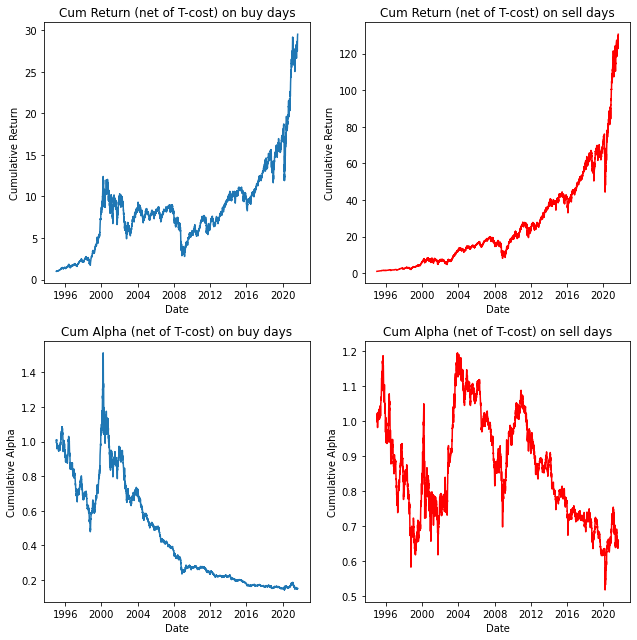

In [7]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.623
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           2.29e-09
Time:                        19:17:25   Log-Likelihood:                 18245.
No. Observations:                6715   AIC:                        -3.648e+04
Df Residuals:                    6708   BIC: 

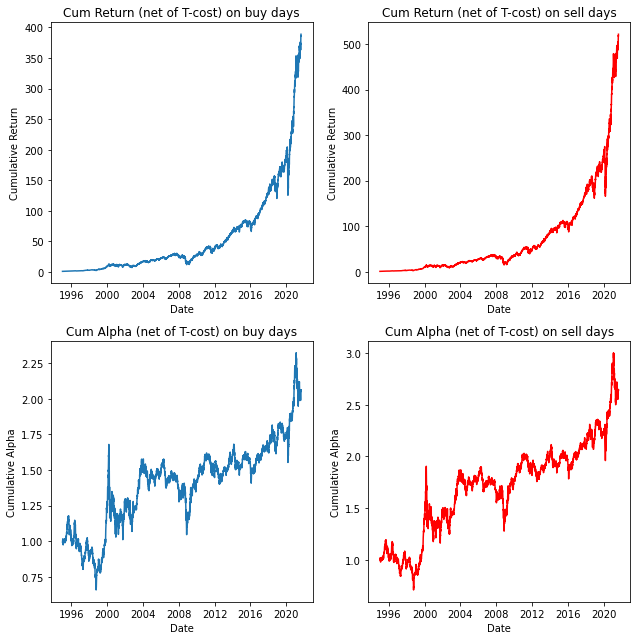

In [8]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.595
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           2.48e-09
Time:                        19:21:09   Log-Likelihood:                 18219.
No. Observations:                6715   AIC:                        -3.642e+04
Df Residuals:                    6708   BIC: 

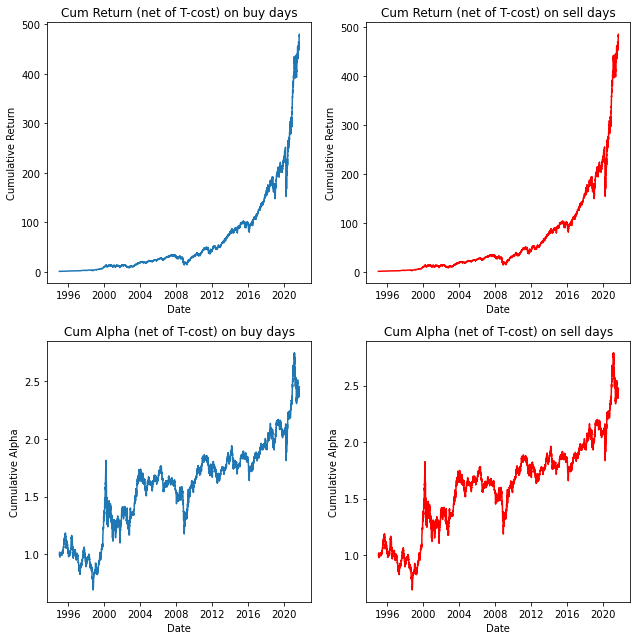

In [9]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.594
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           2.48e-09
Time:                        19:28:02   Log-Likelihood:                 18217.
No. Observations:                6715   AIC:                        -3.642e+04
Df Residuals:                    6708   BIC: 

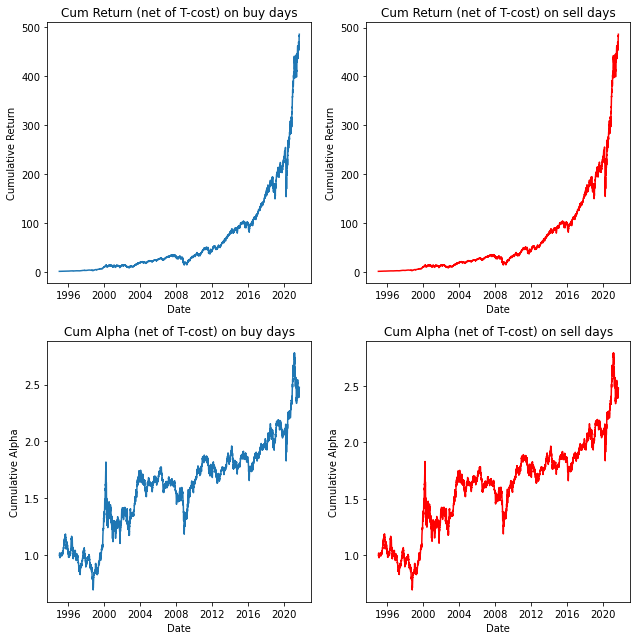

In [10]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.597
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           2.46e-09
Time:                        19:33:14   Log-Likelihood:                 18217.
No. Observations:                6715   AIC:                        -3.642e+04
Df Residuals:                    6708   BIC: 

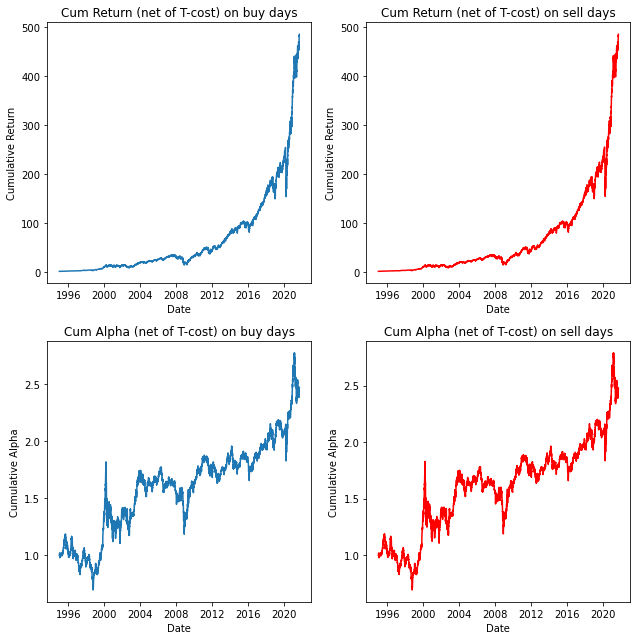

In [11]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now, let's do the same thing but COMBINING THE EVENT WITH VOLUME SPIKES!

# Set buy_tomorrow>0 when df['growthscore'].diff(1) > 0 AND vol spikes above the 50_day_avgVol
# Set Sell_tomorrow>0 when df['growthscore'].diff(1) < 0 AND vol falls below the 50_day_avgVol



In [12]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['growthscore'].notna()].reset_index(drop=True).copy() #drop na values
data = data.loc[data['volume'].notna(),:].reset_index(drop=True).copy()
data = data.loc[data['avgvol50d'].notna(),:].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where((data['growthscore'].diff(1) > 0) & (data['volume']>data['avgvol50d']), 1, 0)
data['sell_tomorrow'] = np.where((data['growthscore'].diff(1) < 0) & (data['volume']<data['avgvol50d']), 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  523370
Total number of Sells:  931778
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  122  problems for buying

There are  200  problems for selling
Total number of Buys:  523248
Total number of Sells:  931578

There are  506  problems for buying

There are  560  problems for selling
Total number of Buys:  2597236
Total number of Sells:  2777236

There are  471  problems for buying

There are  558  problems for selling
Total number of Buys:  2449710
Total number of Sells:  2748310

There are  415  problems for buying

There are  531  problems for selling
Total number of Buys:  2169440
Total number of Sells:  2656243

There are  284  problems for buying

There are  448  problems for selling
Total number of Buys:  1589522
Total number of Sells:  2304142

There are  26  problems for buying

There are  25  problems for selling
Total number of Buys:  522823
Total number of Sells:  930698



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.757
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           3.74e-07
Time:                        19:37:39   Log-Likelihood:                 18095.
No. Observations:                6712   AIC:                        -3.618e+04
Df Residuals:                    6705   BIC: 

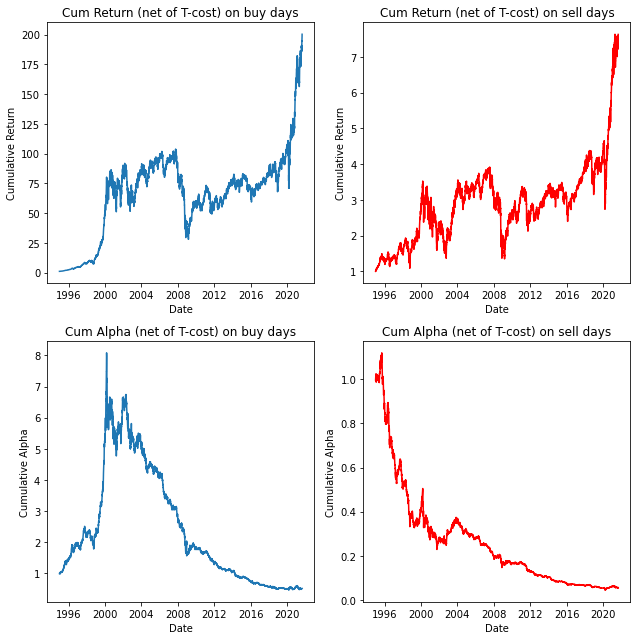

In [13]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     8.028
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.18e-08
Time:                        19:39:42   Log-Likelihood:                 18267.
No. Observations:                6715   AIC:                        -3.652e+04
Df Residuals:                    6708   BIC: 

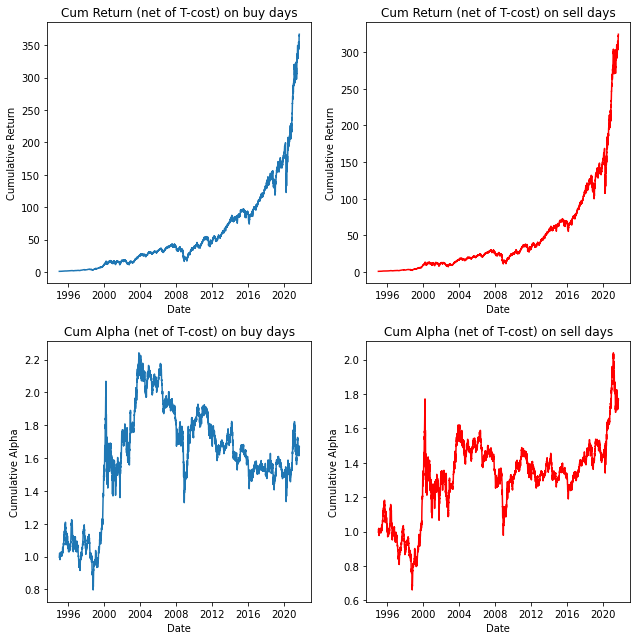

In [14]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     8.312
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           5.39e-09
Time:                        19:42:37   Log-Likelihood:                 18239.
No. Observations:                6715   AIC:                        -3.646e+04
Df Residuals:                    6708   BIC: 

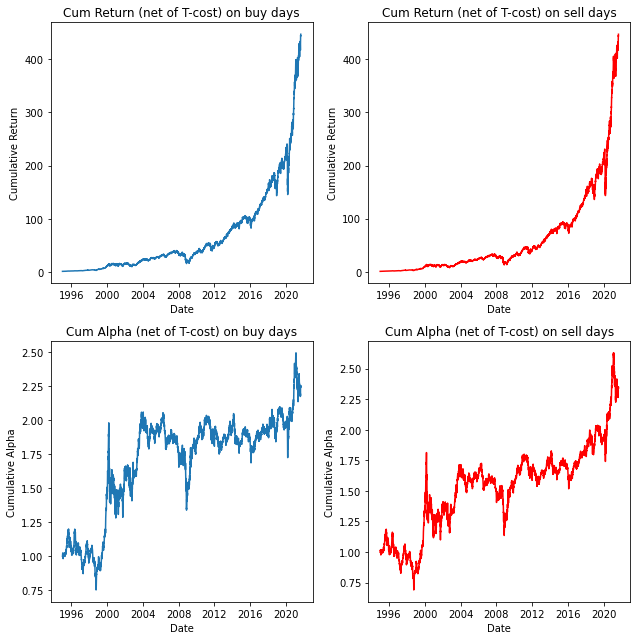

In [15]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.406
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           4.17e-09
Time:                        19:44:45   Log-Likelihood:                 18227.
No. Observations:                6715   AIC:                        -3.644e+04
Df Residuals:                    6708   BIC: 

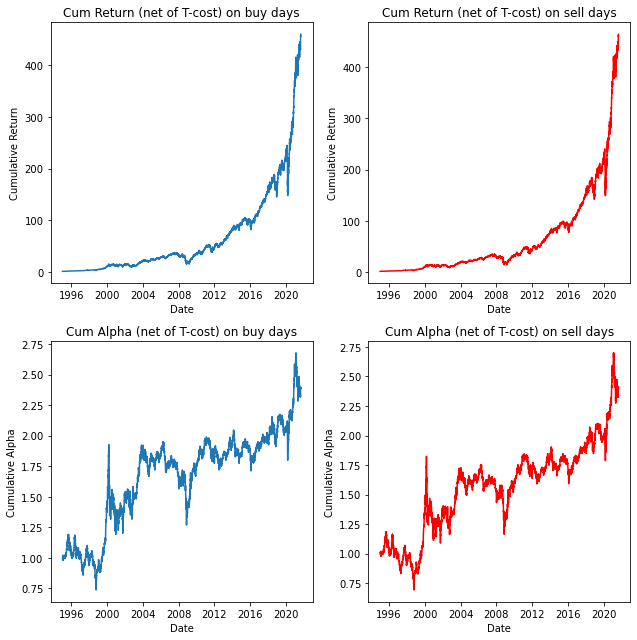

In [16]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.409
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           4.13e-09
Time:                        19:46:54   Log-Likelihood:                 18222.
No. Observations:                6715   AIC:                        -3.643e+04
Df Residuals:                    6708   BIC: 

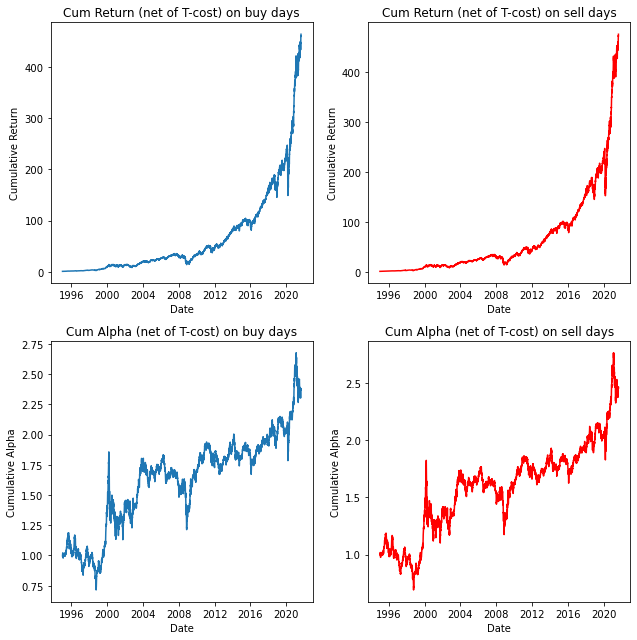

In [17]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)